In [1]:
%pylab inline

matplotlib.rcParams['figure.figsize'] = (12, 7)
matplotlib.rcParams.update({'figure.autolayout': True})
font = {'size': 12}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


In [2]:
import csv
import pandas as pd

In [3]:
def same_result(row):
    res = False
    if row['norm_score'] < 0 and row['norm_liwc'] < 0:
        res = True
    if row['norm_score'] > 0 and row['norm_liwc'] > 0:
        res = True
    if row['norm_score'] == 0 and row['norm_liwc'] == 0:
        res = True
    return res

###a) 1)

In [4]:
df_a1 = pd.read_csv('results_subtraction_100.csv')

In [5]:
df_a1['same'] = df_a1.apply(same_result, axis=1)
total = df_a1.same.count()
equals = df_a1[df_a1.same == True].count()['same']
different = df_a1[df_a1.same == False].count()['same']
print 'Total:', total
print 'Equals:', equals
print 'Different:', different
print 'Accuracy:', float(equals) * 100 / total

Total: 8996
Equals: 3202
Different: 5794
Accuracy: 35.5935971543


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f03f6be6b90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f03f68ff650>]], dtype=object)

/home/antonio/.virtualenvs/lexisnexis/local/lib/python2.7/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


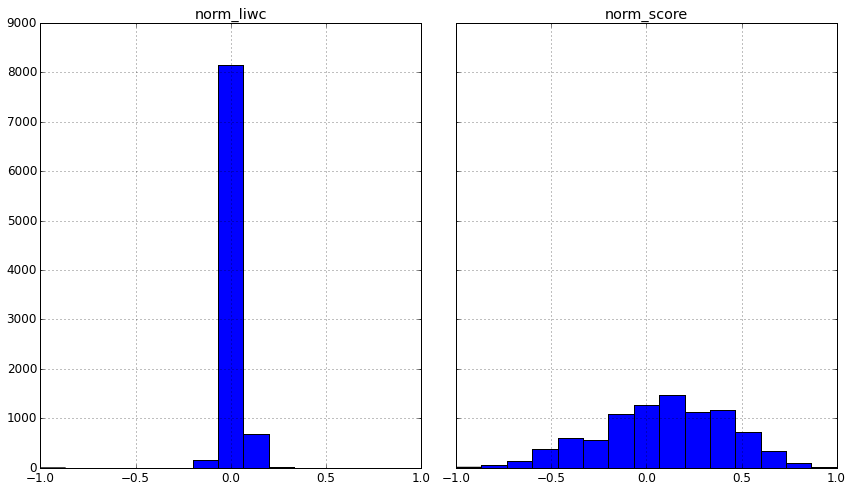

In [6]:
df_a1[['norm_score', 'norm_liwc']].hist(sharey=True, sharex=True, range=[-1, 1], bins=15)

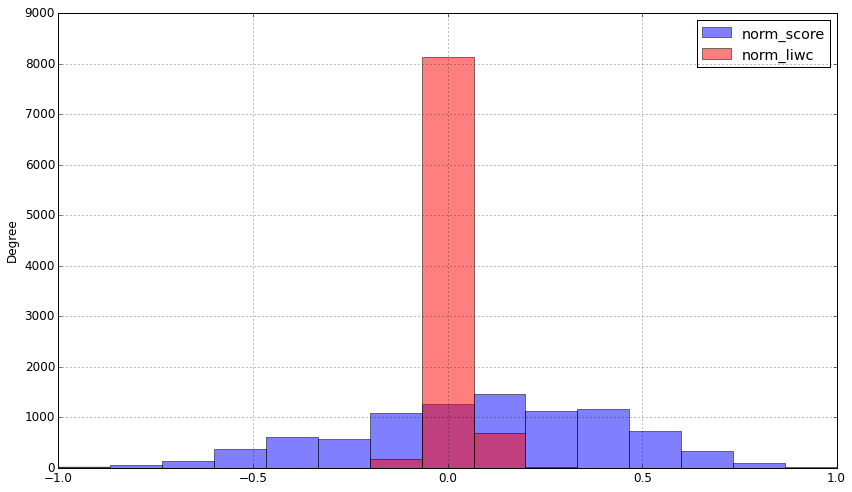

In [7]:
df_a1[['norm_score', 'norm_liwc']].plot(kind='hist', alpha=0.5, color=['b', 'r'], bins=15)

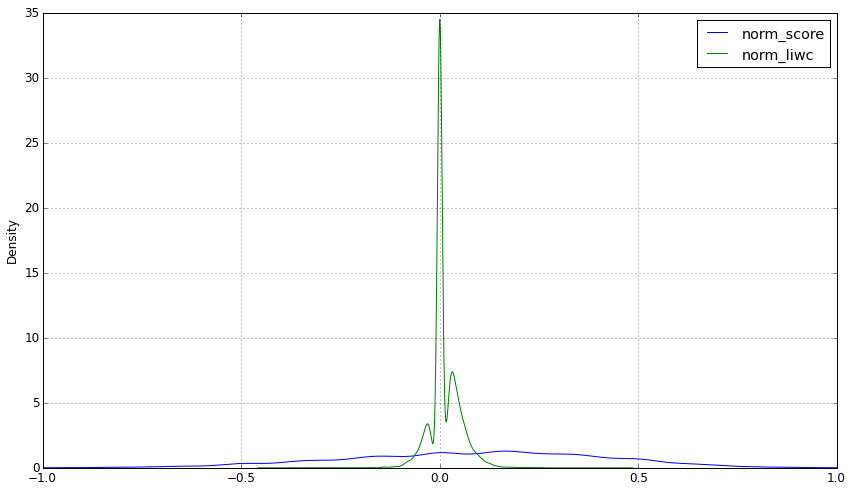

In [8]:
df_a1[['norm_score', 'norm_liwc']].plot(kind='kde', xlim=[-1, 1])

###a) 2)

In [9]:
df_a2 = pd.read_csv('results_minmax_100.csv')

In [10]:
df_a2['same'] = df_a2.apply(same_result, axis=1)
total = df_a2.same.count()
equals = df_a2[df_a2.same == True].count()['same']
different = df_a2[df_a2.same == False].count()['same']
print 'Total:', total
print 'Equals:', equals
print 'Different:', different
print 'Accuracy:', float(equals) * 100 / total

Total: 8996
Equals: 3202
Different: 5794
Accuracy: 35.5935971543


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f03dce25910>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f03dcd67450>]], dtype=object)

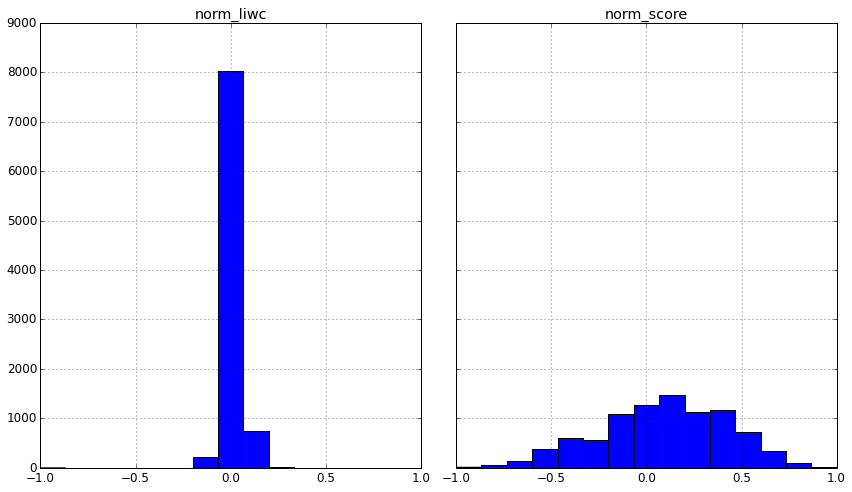

In [11]:
df_a2[['norm_score', 'norm_liwc']].hist(sharey=True, sharex=True, range=[-1, 1], bins=15)

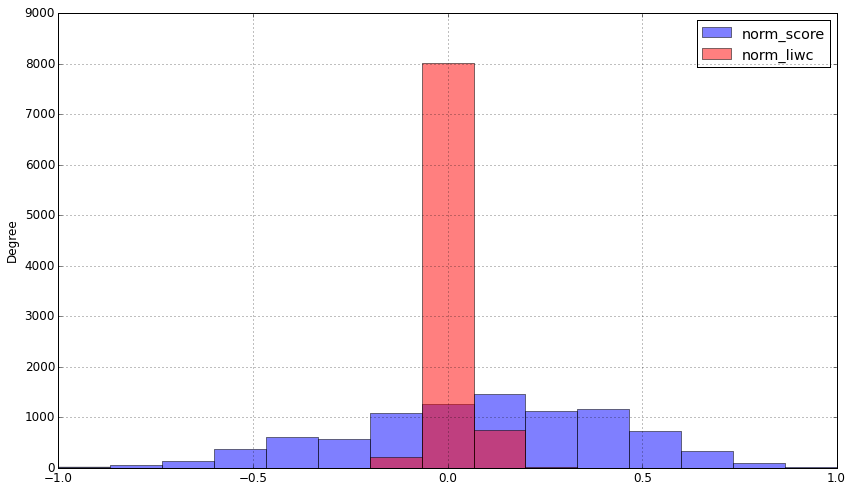

In [12]:
df_a2[['norm_score', 'norm_liwc']].plot(kind='hist', alpha=0.5, color=['b', 'r'], bins=15)

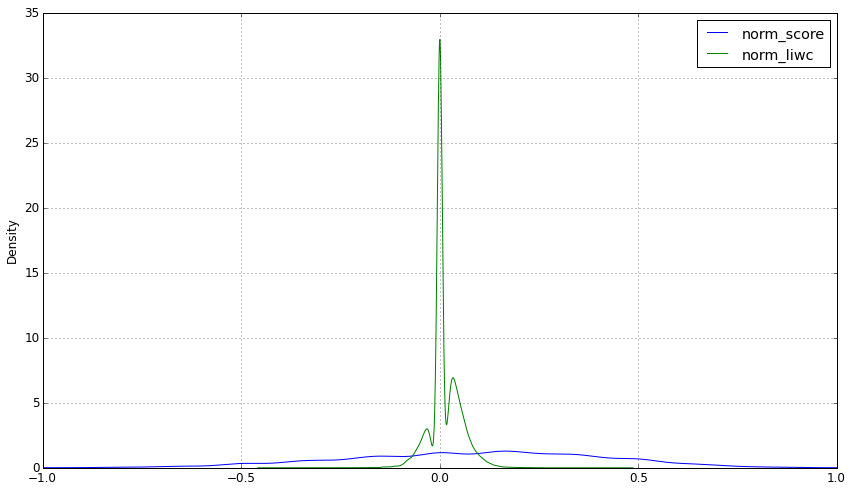

In [13]:
df_a2[['norm_score', 'norm_liwc']].plot(kind='kde', xlim=[-1, 1])

###b) 1)

In [14]:
df_b1 = pd.read_csv('results_subtraction_minmax.csv')

In [15]:
df_b1['same'] = df_b1.apply(same_result, axis=1)
total = df_b1.same.count()
equals = df_b1[df_b1.same == True].count()['same']
different = df_b1[df_b1.same == False].count()['same']
print 'Total:', total
print 'Equals:', equals
print 'Different:', different
print 'Accuracy:', float(equals) * 100 / total

Total: 8996
Equals: 3202
Different: 5794
Accuracy: 35.5935971543


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f03dc850550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f03dc6fc0d0>]], dtype=object)

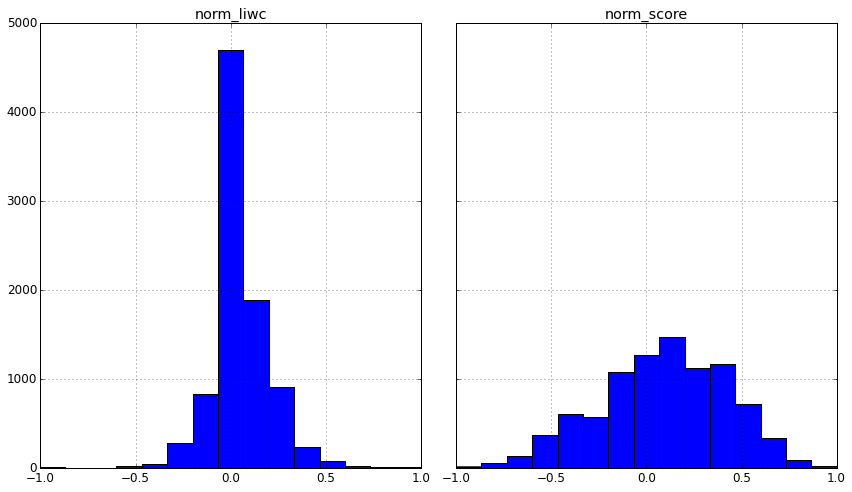

In [16]:
df_b1[['norm_score', 'norm_liwc']].hist(sharey=True, sharex=True, range=[-1, 1], bins=15)

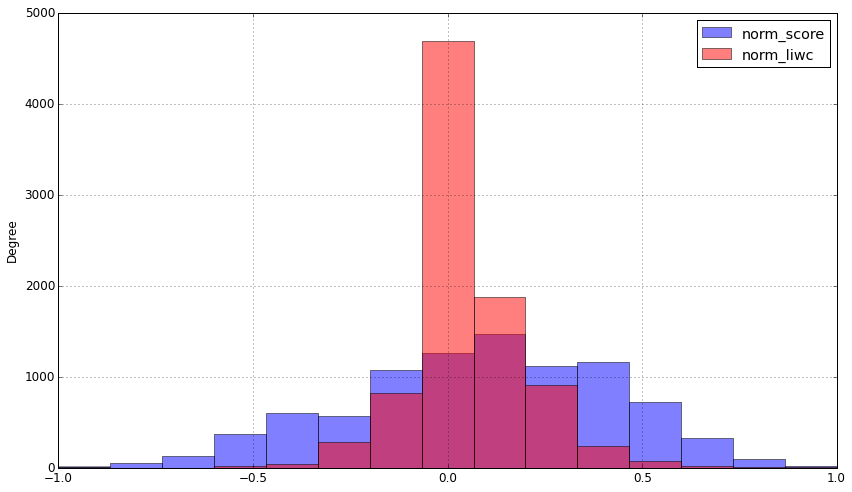

In [17]:
df_b1[['norm_score', 'norm_liwc']].plot(kind='hist', alpha=0.5, color=['b', 'r'], bins=15)

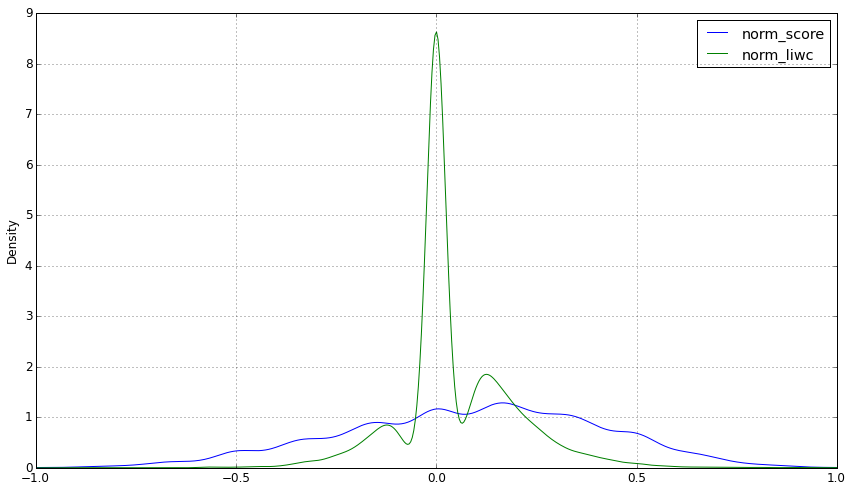

In [18]:
df_b1[['norm_score', 'norm_liwc']].plot(kind='kde', xlim=[-1, 1])

###b) 2)

In [19]:
df_b2 = pd.read_csv('results_minmax_minmax.csv')

In [20]:
df_b2['same'] = df_b2.apply(same_result, axis=1)
total = df_b2.same.count()
equals = df_b2[df_b2.same == True].count()['same']
different = df_b2[df_b2.same == False].count()['same']
print 'Total:', total
print 'Equals:', equals
print 'Different:', different
print 'Accuracy:', float(equals) * 100 / total

Total: 8996
Equals: 3202
Different: 5794
Accuracy: 35.5935971543


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f03d915aed0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f03d8846c90>]], dtype=object)

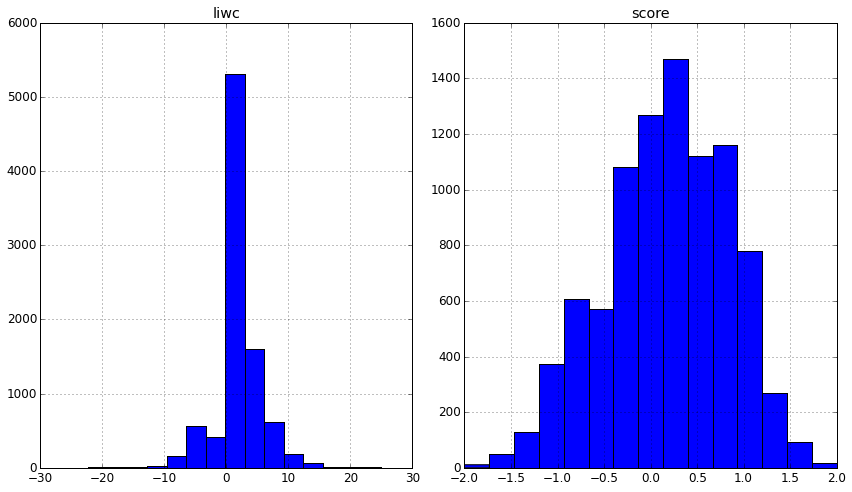

In [70]:
df_b2[['score', 'liwc']].hist(bins=15)

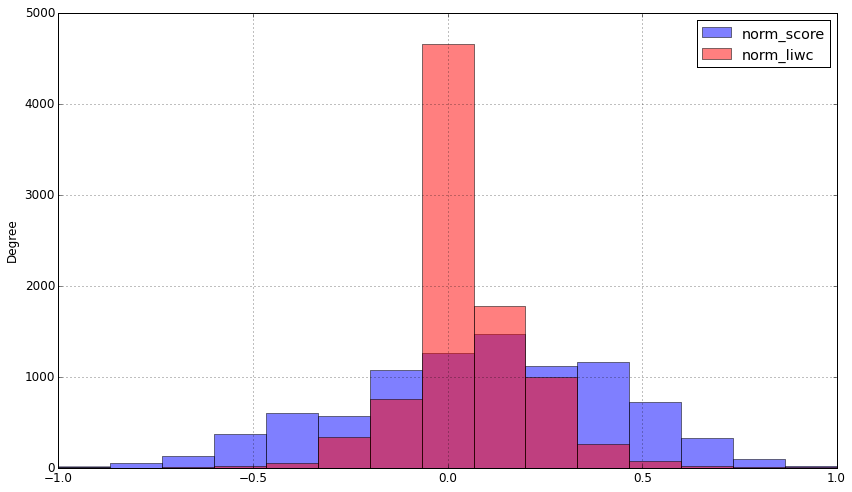

In [22]:
df_b2[['norm_score', 'norm_liwc']].plot(kind='hist', alpha=0.5, color=['b', 'r'], bins=15)

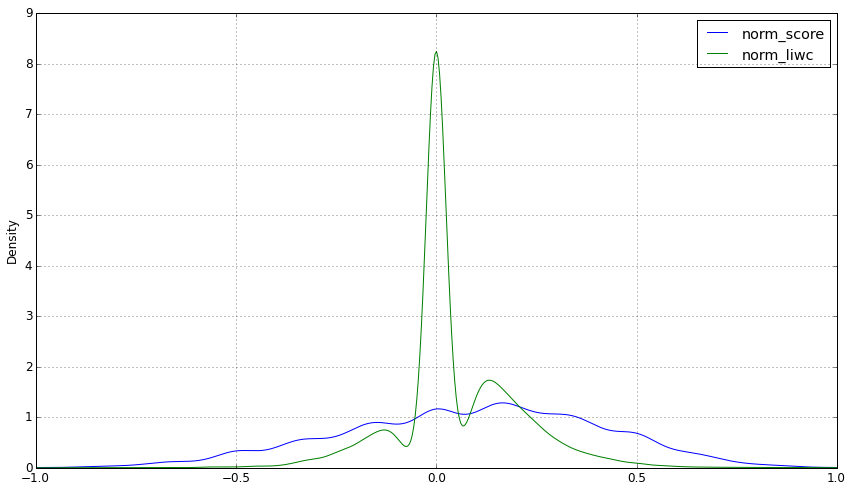

In [23]:
df_b2[['norm_score', 'norm_liwc']].plot(kind='kde', xlim=[-1, 1])

###Normal tests

In [24]:
from statsmodels.stats.diagnostic import normal_ad, kstest_normal

####Anderson-Darling

In [25]:
normal_ad(df_b2['norm_score'])

(24.82852963626101, 0.0)

In [26]:
normal_ad(df_b2['norm_liwc'])

(485.42700854599207, 0.0)

In [27]:
normal_ad(df_b2['score'])

(24.82852963626101, 0.0)

In [28]:
normal_ad(df_b2['liwc'])

(485.42700854599025, 0.0)

In [29]:
df_b2.head()

,#s,sentence,score,liwc,norm_score,norm_liwc,same
0,1,"General Motors will recall nearly 3,200 manua...",-0.666667,0.00,-0.333333,0.0000,False
1,2,"He performs in his D.J. duo New World Punx, w...",0.500000,0.00,0.250000,0.0000,False
2,3,""" And Aim's problem is that many of its larges...",-0.125000,10.00,-0.062500,0.4000,False
3,4,"""'Don't be evil,' he cried, while being chased...",-0.250000,-7.14,-0.125000,-0.2856,True
4,5,"""A lot of companies seem to prefer it to other...",0.333333,0.00,0.166667,0.0000,False


####KS test

In [30]:
kstest_normal(df_b2['norm_score'])

(0.070741426784401595, 4.637567858585372e-121)

In [31]:
kstest_normal(df_b2['norm_liwc'])

(0.26988786385715646, 0.0)

In [32]:
kstest_normal(df_b2['score'])

(0.070741426784401595, 4.637567858585372e-121)

In [33]:
kstest_normal(df_b2['liwc'])

(0.26988786385715646, 0.0)

In [34]:
from scipy.stats.mstats import normaltest

####scipy test

In [35]:
normaltest(df_b2['norm_score'])

(119.06349091527184, 1.3985933201927572e-26)

In [36]:
normaltest(df_b2['norm_liwc'])

(830.38595125464417, 4.8303851447542643e-181)

In [37]:
normaltest(df_b2['score'])

(119.06349091527184, 1.3985933201927572e-26)

In [38]:
normaltest(df_b2['liwc'])

(830.38595125464371, 4.8303851447553656e-181)

In [39]:
from statsmodels.graphics.gofplots import qqplot

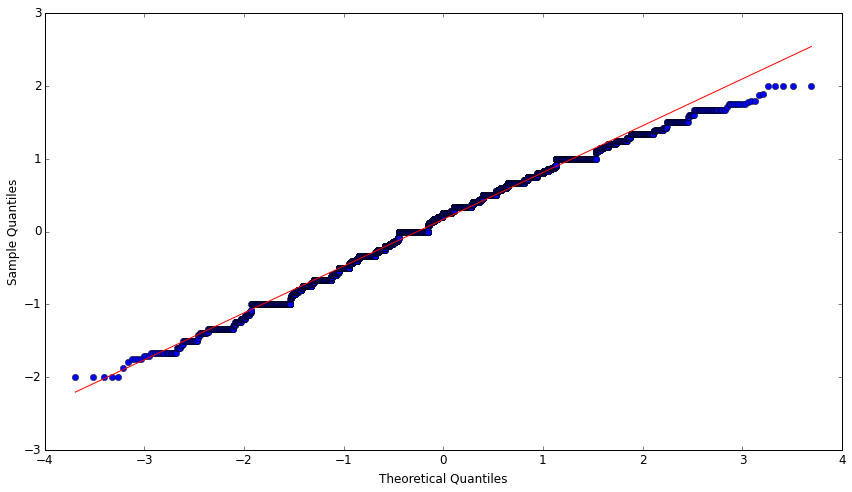

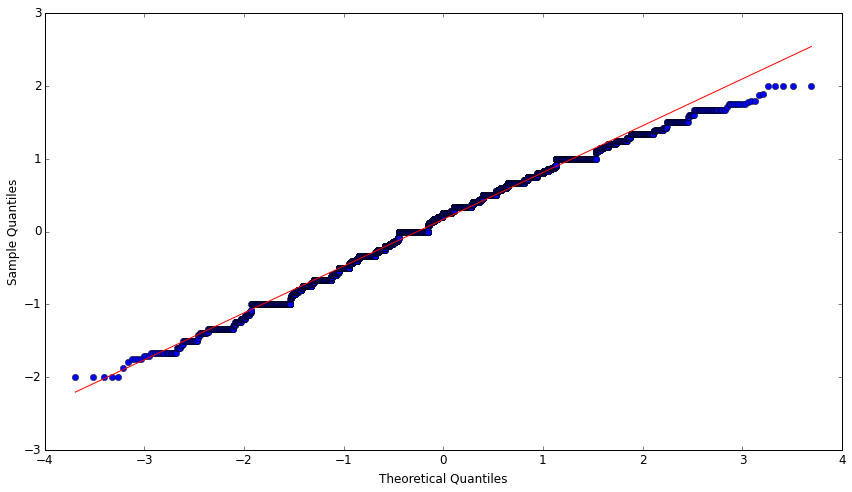

In [73]:
qqplot(df_b2['score'], line='r')

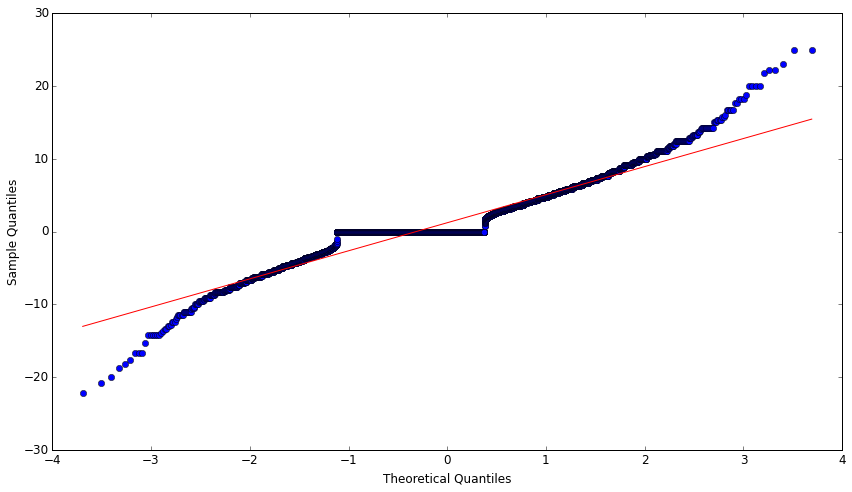

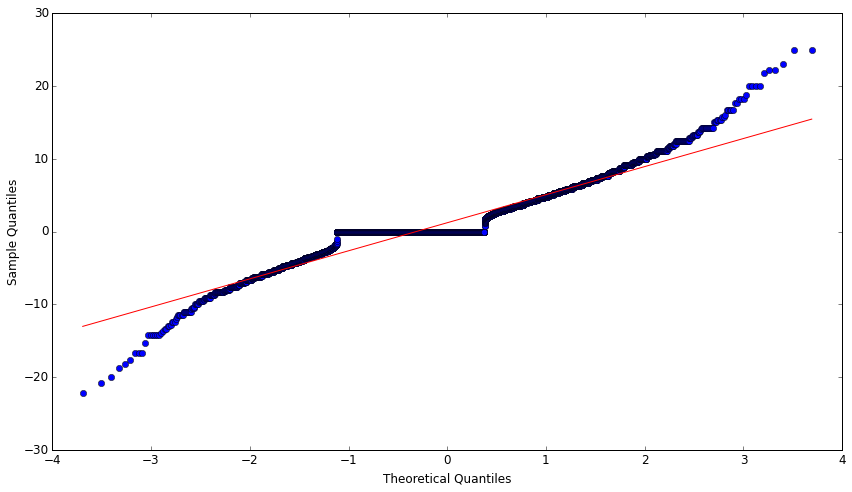

In [75]:
qqplot(df_b2['liwc'], line='s')

In [42]:
from scipy.stats import shapiro

In [43]:
shapiro(df_b2['score'])

/home/antonio/.virtualenvs/lexisnexis/local/lib/python2.7/site-packages/scipy/stats/morestats.py:997: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.991511881351471, 9.277550768234236e-23)

In [44]:
from scipy.stats import skew, kurtosis, skewtest, kurtosistest

In [45]:
skew(df_b2['score'])

-0.23996911967370574

In [46]:
skewtest(df_b2['score'])

(-9.1710106663937445, 4.6860471546981458e-20)

In [47]:
kurtosis(df_b2['score'])

-0.2653947607262741

In [48]:
kurtosistest(df_b2['score'])

(-5.9123645246351328, 3.3723118877765028e-09)

In [67]:
from scipy.stats import chisquare, ks_2samp

In [71]:
ks_2samp(df_b2['score'], df_b2['score'])

(0.0, 1.0)

###Chi square

####Observed values

#####students-neg

In [55]:
df_b2[df_b2.score < 0].count()

#s            2939
sentence      2939
score         2939
liwc          2939
norm_score    2939
norm_liwc     2939
same          2939
dtype: int64

#####students-neu

In [56]:
df_b2[df_b2.score == 0].count()

#s            1020
sentence      1020
score         1020
liwc          1020
norm_score    1020
norm_liwc     1020
same          1020
dtype: int64

#####students-pos

In [57]:
df_b2[df_b2.score > 0].count()

#s            5037
sentence      5037
score         5037
liwc          5037
norm_score    5037
norm_liwc     5037
same          5037
dtype: int64

#####liwc-neg

In [58]:
df_b2[df_b2.liwc < 0].count()

#s            1182
sentence      1182
score         1182
liwc          1182
norm_score    1182
norm_liwc     1182
same          1182
dtype: int64

#####liwc-neu

In [59]:
df_b2[df_b2.liwc == 0].count()

#s            4640
sentence      4640
score         4640
liwc          4640
norm_score    4640
norm_liwc     4640
same          4640
dtype: int64

#####liwc-pos

In [61]:
df_b2[df_b2.liwc > 0].count()

#s            3174
sentence      3174
score         3174
liwc          3174
norm_score    3174
norm_liwc     3174
same          3174
dtype: int64

#####total students

In [63]:
2939 + 1020 + 5037

8996

#####total liwc

In [64]:
1182 + 4640 + 3174

8996

In [ ]:
#####total neg

####Expected values

#####students-neg

In [65]:
np.linspace(-15, 15, 9)

array([-15.  , -11.25,  -7.5 ,  -3.75,   0.  ,   3.75,   7.5 ,  11.25,  15.  ])